!pip install git+https://github.com/ssut/py-hanspell.git
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git
!pip install konlpy
!pip install wordcloud

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import sys
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('야놀자호텔리뷰.csv')

In [6]:
df

,Unnamed: 0,hotel,star,review,date,real_date
0,0,AC 호텔 바이 메리어트 서울 강남,4,발렛파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요~!,10시간 전,2022. 04. 03
1,1,AC 호텔 바이 메리어트 서울 강남,5,굳굳굳굳굳,6일 전,2022. 04. 01
2,2,AC 호텔 바이 메리어트 서울 강남,3,생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...,6일 전,2022. 04. 01
3,3,AC 호텔 바이 메리어트 서울 강남,5,오픈하고 얼마안되서 갔었는데 깔끔하고 좋은 호텔이였습니다. 오픈초기에 사소한 부분에...,2022. 03. 27,2022. 03. 27
4,4,몬드리안 서울 이태원(Mondrian Seoul Itaewon),5,객실이 깨끗하고 너무 예뻣어요!,3일 전,2022. 04. 01
...,...,...,...,...,...,...
150504,150504,그랜드 하얏트 서울,5,코로나로 인해 바베큐를 못해 아쉬웠지만... \n호캉스 잘 즐기다 왔습니다 또 오고...,2020. 08. 22,2020. 08. 22
150505,150505,그랜드 하얏트 서울,4,호텔 좋고 수영장도 좋다\n재방문의사 있음,2020. 08. 20,2020. 08. 20
150506,150506,그랜드 하얏트 서울,4,오성급 호텔 스멜 풀풀 남\n수영장 넓고 좋으나 6시까지하는건 아쉬움\n풀바 음식은...,2020. 08. 20,2020. 08. 20
150507,150507,그랜드 하얏트 서울,5,뷰도좋고 직원들도 친절하고 잘쉬다가 갑니다,2020. 08. 14,2020. 08. 14


In [7]:
ddup = df.drop_duplicates(subset=['hotel','star','review','date'], keep='first', inplace=False, ignore_index=True)

In [8]:
ddup = ddup.drop('Unnamed: 0',axis=1)

In [9]:
ddup

,hotel,star,review,date,real_date
0,AC 호텔 바이 메리어트 서울 강남,4,발렛파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요~!,10시간 전,2022. 04. 03
1,AC 호텔 바이 메리어트 서울 강남,5,굳굳굳굳굳,6일 전,2022. 04. 01
2,AC 호텔 바이 메리어트 서울 강남,3,생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...,6일 전,2022. 04. 01
3,AC 호텔 바이 메리어트 서울 강남,5,오픈하고 얼마안되서 갔었는데 깔끔하고 좋은 호텔이였습니다. 오픈초기에 사소한 부분에...,2022. 03. 27,2022. 03. 27
4,몬드리안 서울 이태원(Mondrian Seoul Itaewon),5,객실이 깨끗하고 너무 예뻣어요!,3일 전,2022. 04. 01
...,...,...,...,...,...
124796,그랜드 하얏트 서울,4,친절하시고 조식도 맛있었어요~!\n하지만 방음...이...많이 안되더라구요;;,1시간 전,2022. 04. 04
124797,그랜드 하얏트 서울,5,역시 5성급 하얏트답습니다. 조식 포함시 좀 비싸긴 한데 조식빼고 생각하면 매우 괜...,1시간 전,2022. 04. 04
124798,그랜드 하얏트 서울,5,완전 좋았습니디,6시간 전,2022. 04. 04
124799,그랜드 하얏트 서울,5,깔끔하고 좋았어용,1일 전,2022. 04. 03


In [13]:
ddup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124801 entries, 0 to 124800
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   hotel      124801 non-null  object
 1   star       124801 non-null  int64 
 2   review     124801 non-null  object
 3   date       124801 non-null  object
 4   real_date  124801 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.8+ MB


In [10]:
rawdf = df

In [ ]:
rawdf = rawdf.drop('Unnamed: 0',axis=1)

In [ ]:
dupp = rawdf.loc[rawdf.duplicated()]

In [ ]:
dupp.hotel.describe()

count              25708
unique                88
top       노보텔 앰배서더 서울 용산
freq                4480
Name: hotel, dtype: object

In [11]:
df = ddup

In [12]:
# 각 전처리 후, 18글자 이하의 리뷰 갯수 비율 확인하는 함수 
def del_percent():
    under_18 = df.loc[df['length'] <= 18,'review'].count()
    all_count = df['review'].count()
    print('18글자 이하 리뷰갯수:', under_18)
    print(under_18 / all_count * 100)


In [13]:
# 리뷰의 length 측정해서 컬럼으로 넣어줌
df['length'] = df['review'].apply(lambda x: len(str(x)))
df['review']=df['review'].astype('str')

In [14]:
#1.'\n' -> ''
df['review'] = df['review'].apply(lambda x: x.replace('\n',''))
df['length'] = df['review'].apply(lambda x: len(x))
del_percent()

18글자 이하 리뷰갯수: 73659
59.02116168940954


In [15]:
import re
# 2. ~, !, ., >
def cleanText(readData):
 
    
    text = re.sub('[-=+,#/\?:;^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》❤]', '', readData)
    return text

df['review'] = df['review'].apply(cleanText)
df['length'] = df['review'].apply(lambda x: len(x))
del_percent()

18글자 이하 리뷰갯수: 75138
60.206248347369005


In [16]:
def cleanText2(readData):
 
    text = re.sub('[ㄱㄴㄷㄹㅁㅂㅅㅇㅈㅊㅋㅌㅍㅎㅃㅉㄸㄲㅆㅛㅕㅑㅐㅔㅗㅓㅏㅣㅜㅠㅡ]', '', readData)
    return text
df['review'] = df['review'].apply(cleanText2)
df['length'] = df['review'].apply(lambda x: len(x))
del_percent()

18글자 이하 리뷰갯수: 75471
60.473073132426826


In [17]:
def cleanText3(readData):
    
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

    text = emoji_pattern.sub(r'', readData)
    return text

df['review'] = df['review'].apply(cleanText3)
df['length'] = df['review'].apply(lambda x: len(x))
del_percent()

18글자 이하 리뷰갯수: 75498
60.49470757445854


In [23]:
df[df['length'] > 500].shape

(249, 6)

In [24]:
df = df[df['length'] <= 500]
df.shape

(124552, 6)

In [25]:
from pykospacing import Spacing
spacing = Spacing()

In [26]:
def space_check(review):
    result = spacing(review)
    return result

In [27]:
df['review']=df['review'].astype('str')

<ipython-input-27-7574688e9d9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']=df['review'].astype('str')


In [ ]:
df['review_space'] = df['review'].apply(space_check)

In [18]:
df['review']=df['review'].astype('str')

In [19]:
df['review_spell_check'] = df['review'].apply(spell_check)

넘조아효 
굿굿굿굿굿
나쁘지읺음
좋아옄
역대급 최고
좋아욬
따듯하게 호캉스 하고 돌아갑니다
짱조름요 
굳굳굳굳굳♡♡


In [ ]:
spell_check("아주좋앗습다")

'아주좋앗습다'

In [ ]:
df=df.drop(df.columns[0],axis=1)

In [2]:
df = pd.read_csv('야놀자스페이스.csv')

In [4]:
df=df.drop(df.columns[0],axis=1)

In [5]:
df

,hotel,star,review,date,real_date,length,review_space
0,AC 호텔 바이 메리어트 서울 강남,4,발렛파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요,10시간 전,2022. 04. 03,35,발렛파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요
1,AC 호텔 바이 메리어트 서울 강남,5,굳굳굳굳굳,6일 전,2022. 04. 01,5,굳굳 굳굳 굳
2,AC 호텔 바이 메리어트 서울 강남,3,생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...,6일 전,2022. 04. 01,84,생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...
3,AC 호텔 바이 메리어트 서울 강남,5,오픈하고 얼마안되서 갔었는데 깔끔하고 좋은 호텔이였습니다 오픈초기에 사소한 부분에서...,2022. 03. 27,2022. 03. 27,99,오픈하고 얼마 안 되서 갔었는데 깔끔하고 좋은 호텔이였습니다 오픈 초기에 사소한 부...
4,몬드리안 서울 이태원(Mondrian Seoul Itaewon),5,객실이 깨끗하고 너무 예뻣어요,3일 전,2022. 04. 01,16,객실이 깨끗하고 너무 예 뻣어요
...,...,...,...,...,...,...,...
124547,그랜드 하얏트 서울,4,친절하시고 조식도 맛있었어요하지만 방음이많이 안되더라구요,1시간 전,2022. 04. 04,31,친절하시고 조식도 맛있었어요 하지만 방음이 많이 안 되더라구요
124548,그랜드 하얏트 서울,5,역시 5성급 하얏트답습니다 조식 포함시 좀 비싸긴 한데 조식빼고 생각하면 매우 괜찮...,1시간 전,2022. 04. 04,89,역시 5 성급 하얏트 답습니다 조식 포함 시 좀 비싸긴 한데 조식 빼고 생각하면 매...
124549,그랜드 하얏트 서울,5,완전 좋았습니디,6시간 전,2022. 04. 04,8,완전 좋았습니디
124550,그랜드 하얏트 서울,5,깔끔하고 좋았어용,1일 전,2022. 04. 03,9,깔끔하고 좋았어용


In [7]:
df = df.dropna()

In [8]:
# 결측치 존재 여부를 확인해주는 함수
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(df)

결측치가 존재하지 않습니다


In [ ]:
from hanspell import spell_checker

In [10]:
def spell_check(review):
    try:
      result = spell_checker.check(review)
      return result.checked
    except:
      print(review)
      return review
    

In [11]:
df['review']=df['review'].astype('str')

<ipython-input-11-7574688e9d9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review']=df['review'].astype('str')


In [12]:
df['review_spell_check'] = df['review'].apply(spell_check)

업청깨끗해여
편하곶늫음
츄홓
역시 갓라머뭄 짱짱
조아요오옹
괜차나욬
너무좋았습니


<ipython-input-12-be5ec2530679>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_spell_check'] = df['review'].apply(spell_check)


In [14]:
df.to_csv("야놀자한스펠.csv")

In [2]:
df = pd.read_csv('야놀자한스펠.csv')

In [3]:
df = df.loc[df.star>0]

In [12]:
df = df.drop('Unnamed: 0',axis=1)

In [4]:
val_count = df['star'].value_counts() # 유니크값의 개수를 확인합니다.
val_count

5    91681
4    21419
3     6314
1     1604
2     1554
Name: star, dtype: int64

In [13]:
bad = df.loc[df.star<=3]

In [14]:
bad['label'] = 0

<ipython-input-14-04ed5c8ffe1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad['label'] = 0


In [15]:
good = df.loc[df.star==5]

In [16]:
good['label']= 1

<ipython-input-16-8290465e9f27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good['label']= 1


In [18]:
postive = good.sample(10000)

In [19]:
postive

,hotel,star,review,date,real_date,length,review_space,review_spell_check,label
46692,호텔 더 디자이너스 홍대,5,친절하고 따뜻하고 넘 좋았습니다,2020. 04. 19,2020. 04. 19,17,친절하고 따뜻하고 넘 좋았습니다,친절하고 따뜻하고 너무 좋았습니다,1
108126,호텔 로프트 서울,5,편하게 쉬다가 갑니다,2020. 06. 14,2020. 06. 14,11,편하게 쉬다가 갑니다,편하게 쉬다가 갑니다,1
99198,신라스테이 마포,5,깨끗하고 편하긴한데 생각보다 청결도는 떨어짐,2020. 11. 28,2020. 11. 28,24,깨끗하고 편하긴 한데 생각보다 청결도는 떨어짐,깨끗하고 편하긴 한데 생각보다 청결 도는 떨어짐,1
88352,글래드 마포,5,위치도 너무 좋고 깔끔한 인테리어에 잘 지냈습니다,2022. 02. 19,2022. 02. 19,27,위치도 너무 좋고 깔끔한 인테리어에 잘 지냈습니다,위치도 너무 좋고 깔끔한 인테리어에 잘 지냈습니다,1
68100,호텔 선샤인 서울,5,깨끗하고 괜찮았습니다,2018. 10. 30,2018. 10. 30,11,깨끗하고 괜찮았습니다,깨끗하고 괜찮았습니다,1
...,...,...,...,...,...,...,...,...,...
88843,글래드 마포,5,항상 가지만 침대에서나오는 구스털이 날려요 먼지가 많고 환기가 잘 안되서 목이 자주...,2021. 11. 15,2021. 11. 15,53,항상 가지만 침대에서 나오는 구스털이 날려 요 먼지가 많고 환기가 잘 안 되서 목이...,항상 가지만 침대에서 나오는 구스 털이 날려요 먼지가 많고 환기가 잘 안돼서 목이 ...,1
6959,L7 강남 바이 롯데,5,헬스장도 좋고 룸컨디션도 깔끔하고 선정릉 뷰도 좋습니다,2021. 07. 31,2021. 07. 31,30,헬스장도 좋고 룸 컨디션도 깔끔하고 선정릉 뷰도 좋습니다,헬스장도 좋고 룸 컨디션도 깔끔하고 선정릉 뷰도 좋습니다,1
25829,L7 명동 바이 롯데,5,깨끗했어요,2022. 02. 19,2022. 02. 19,5,깨끗했어요,깨끗했어요,1
45982,메리골드 호텔,5,깨끗한 청소와 편리성좋습니다이지역 출장은 이곳으로 옵니다,2018. 07. 27,2018. 07. 27,31,깨끗한 청소와 편리성 좋습니다이 지역 출장은 이곳으로 옵니다,깨끗한 청소와 편리성 좋습니다 이 지역 출장은 이곳으로 옵니다,1


In [37]:
train = pd.concat([postive, bad])

In [38]:
train

,hotel,star,review,date,real_date,length,review_space,label
102896,신라스테이 마포,5,좋았습니다,2018. 05. 22,2018. 05. 22,5,좋았습니다,1
17701,신라스테이 서초,5,직원분들도 정말 친절하시고 객실도 깔끔하고 뷰도 좋고 전체적으로 만족스럽고 좋았습니다,2020. 12. 23,2020. 12. 23,47,직원 분들도 정말 친절하시고 객실도 깔끔하고 뷰도 좋고 전체적으로 만족스럽고 좋았습니다,1
91027,글래드 마포,5,편히쉬다왔습니다,2021. 06. 22,2021. 06. 22,8,편히 쉬다 왔습니다,1
5705,노보텔 앰배서더 서울 용산,5,너무 편하고 좋았습니다,2020. 03. 24,2020. 03. 24,12,너무 편하고 좋았습니다,1
30082,롯데시티호텔 명동,5,좋아요역시,2022. 02. 02,2022. 02. 02,5,좋아요 역시,1
...,...,...,...,...,...,...,...,...
124518,호텔 더 디자이너스 리즈 강남,2,서비스 제품은 부실했고 무엇보다 방음이 하나도 안되서 실망했어요,5일 전,2022. 04. 01,35,서비스 제품은 부실했고 무엇보다 방음이 하나도 안 되서 실망했어요,0
124525,신라스테이 서초,3,좋아좋아좋아,3일 전,2022. 04. 01,6,좋아 좋아 좋아,0
124530,신라스테이 서초,3,라운지를 이용했는데 정말 먹을게 하나도 없고 해피아워관련되서 이렇게 안좋은데는 처음...,2022. 03. 28,2022. 03. 28,76,라운지를 이용했는데 정말 먹을 게 하나도 없고 해피 아워 관련되서 이렇게 안 좋은 ...,0
124534,안테룸 서울,1,밤에 너무 추워요 자다가 감기걸릴뻔했어요,2일 전,2022. 04. 02,22,밤에 너무 추워요 자 다가 감기 걸릴 뻔 했어요,0


In [ ]:
import matplotlib.pyplot as plt # 그래프 그리기 위한 패키지
%matplotlib inline
plt.style.use("ggplot")

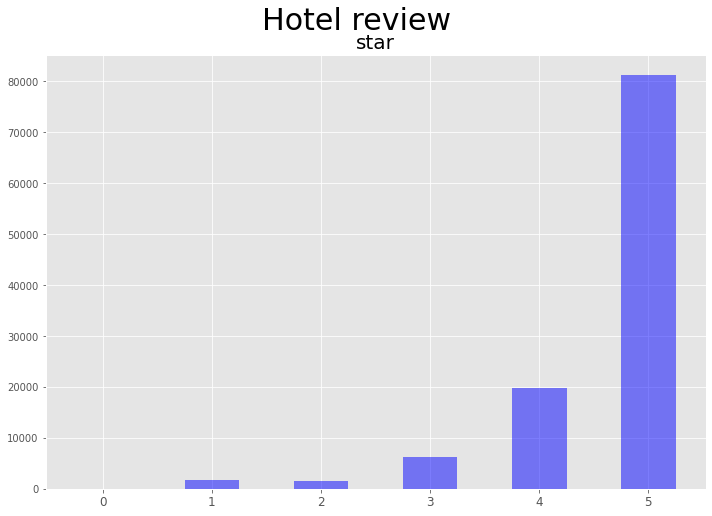

In [ ]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = df['star']

plt.figure(figsize=(10,7.5)) # 그래프 이미지 크기 설정
plt.suptitle("Hotel review", fontsize=30) # 부제목과 폰트 크기 설정

plt.title('star', fontsize=20) # 제목과 폰트 크기 설정
temp = feature.value_counts() # feature 변수의 변수별 개수 계산
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5) # 막대그래프 생성
plt.xticks(temp.keys(), fontsize=12) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

In [ ]:
bad=df.loc[df.star<4]
bad.tail(50)

,Unnamed: 0,hotel,star,review,date,real_date,length
110102,127713,은평 씨에스에비뉴 호텔,3,조식은 기대하지말고 주변에 뭐 편의시설은 부족하니 사서 들고가길 추천,2018. 08. 13,2018. 08. 13,38
110103,127714,은평 씨에스에비뉴 호텔,3,나쁘진 않은데 그렇다고 좋지도 않아요 주변 편의시설이 부족한게 아쉽고 조식은 별로였어요,2018. 08. 13,2018. 08. 13,48
110106,127717,은평 씨에스에비뉴 호텔,2,바닥도 더럽고 커피포트는 정말 충격이였어요수압도 약하고청소,2018. 08. 06,2018. 08. 06,32
110109,127721,은평 씨에스에비뉴 호텔,2,에어컨 상태가 절 돌아가긴 하지만 너무 케케한 남새가 나네요 뷰는 괜찮았습니다,2018. 08. 04,2018. 08. 04,43
110121,127737,은평 씨에스에비뉴 호텔,1,생각보다 별루예요,2018. 07. 08,2018. 07. 08,9
110135,127754,은평 씨에스에비뉴 호텔,3,편의점안에 날짜 잘보고 사야될듯해요,2018. 06. 08,2018. 06. 08,19
110145,127765,은평 씨에스에비뉴 호텔,3,깨끗하고 좋은편이나 외국인용 버스로 관광호텔인진 몰랐네요,2018. 05. 21,2018. 05. 21,31
110164,127792,은평 씨에스에비뉴 호텔,2,다 좋습니다 시설 위치 등등 방 세번바뀠는데 결국 남들 자던 사용한 시트에서 잠 ...,2018. 04. 22,2018. 04. 22,89
110166,127794,은평 씨에스에비뉴 호텔,1,너무 낡고더럽고누군가 먹다 넣어둔 배스킨라빈스 아이스크림 보는 순간 정말뛰쳐나가고싶...,2018. 04. 19,2018. 04. 19,144
110170,127798,은평 씨에스에비뉴 호텔,3,교통은좋지만 상대적으로 길가라 시끄럽고 무엇보다도 호텔이좀 춥네요 나름깔끔햇어요,2018. 04. 02,2018. 04. 02,46


In [ ]:
bad['length'].describe()

count    9477.000000
mean       80.800781
std       121.085304
min         0.000000
25%        13.000000
50%        37.000000
75%        96.000000
max      1677.000000
Name: length, dtype: float64

In [ ]:
df.loc[df.star==0]

,Unnamed: 0,hotel,star,review,date,real_date,length
12096,13763,신라스테이 역삼,0,바른후기 운영 정책에 의해 블라인드 조치되었습니다,2018. 01. 01,2018. 01. 01,27
36525,41160,홍대 나인브릭 호텔,0,바른후기 운영 정책에 의해 블라인드 조치되었습니다,2021. 09. 26,2021. 09. 26,27
65823,75024,라마다 서울 동대문,0,바른후기 운영 정책에 의해 블라인드 조치되었습니다,2021. 04. 14,2021. 04. 14,27
69130,78801,호텔 피제이 명동,0,바른후기 운영 정책에 의해 블라인드 조치되었습니다,2017. 11. 03,2017. 11. 03,27
79966,90829,아리랑힐 호텔 동대문,0,바른후기 운영 정책에 의해 블라인드 조치되었습니다,2018. 01. 09,2018. 01. 09,27


In [ ]:
df['length'].describe()

count    2668.000000
mean       28.050225
std        42.675207
min         0.000000
25%         7.000000
50%        13.000000
75%        30.000000
max       463.000000
Name: length, dtype: float64

In [20]:
df_train = df.review_spell_check.copy()

In [21]:
df_train

0                       발레파킹 비용이 있긴 했지만 방도 나름 괜찮고 조식도 맛있었어요
1                                                     굳굳굳굳굳
2         생각보다 방이 좁아서 놀랐어요 아무래도 안마의자나 고급 블루투스 스피커처럼 주변기기...
3         오픈하고 얼마 안 돼서 갔었는데 깔끔하고 좋은 호텔이었습니다 오픈 초기에 사소한 부...
4                                          객실이 깨끗하고 너무 예뻤어요
                                ...                        
122573                    친절하시고 조식도 맛있었어요 하지만 방음이 많이 안되더라고요
122574    역시 5성급 하얏트 답습니다 조식 포함 시 좀 비싸긴 한데 조식 빼고 생각하면 매우...
122575                                             완전 좋았습니디
122576                                            깔끔하고 좋았어요
122577                                             너무 좋았습니다
Name: review_spell_check, Length: 122572, dtype: object

In [57]:
def df2str(df):
    #전체 리뷰들을 하나의 문자열로 만듦
    s = [s for s in df]
    document = ""
    for i in range(len(s)):
      #print(s[i])
      document += s[i]
    return document

def get_noun(text):
    # okt tagger를 이용해 명사 추출
    okt = Okt()
    noun = okt.nouns(text)
    for i,v in enumerate(noun):
        if len(v)<2:
            noun.pop(i)
    count = Counter(noun)
    noun_list = count.most_common()

    return noun_list

def visualize(noun_list, title):
    # 워드클라우드 이미지 생성
    wc= WordCloud(
        font_path = 'malgun',    # 한글폰트 경로 설정
        background_color='white',                     # 배경 색깔 정하기
        colormap = 'Dark2',                           # 폰트 색깔 정하기
        width = 800,
        height = 800).generate_from_frequencies(dict(noun_list)) 
    
    plt.figure(figsize=(10,10)) #이미지 사이즈 지정
    plt.suptitle("Word Cloud", fontsize=40)
    plt.title(title, fontsize=20)
    plt.imshow(wc, interpolation='lanczos') #이미지의 부드럽기 정도
    plt.axis('off') #x y 축 숫자 제거
    plt.show()  # 워드클라우드 이미지 확인
    
    return wc

In [41]:
#document = df2str(df_train) # 전체 리뷰들을 하나의 문자열로 만듦
noun_list = get_noun(document) # 명사 추출, 개수 셈
noun_list[:20] # 상위 20개 단어 확인

[('직원', 7900),
 ('호텔', 7833),
 ('이용', 7816),
 ('위치', 7089),
 ('객실', 6242),
 ('시설', 6173),
 ('정말', 5488),
 ('침대', 4587),
 ('최고', 4508),
 ('조금', 3931),
 ('방문', 3906),
 ('조식', 3694),
 ('가격', 3546),
 ('아주', 3531),
 ('항상', 3384),
 ('성비', 3352),
 ('서비스', 3255),
 ('체크', 2924),
 ('생각', 2851),
 ('주차', 2849)]

In [43]:
df_noun = pd.DataFrame(noun_list)

In [44]:
df_noun.to_csv("야놀자명사.csv", encoding='utf-8', index = False)

In [71]:
top = df_noun[:100]

In [72]:
top

,0,1
0,직원,7900
1,호텔,7833
2,이용,7816
3,위치,7089
4,객실,6242
...,...,...
95,모든,893
96,방,892
97,안,883
98,바닥,859


In [69]:
tt = pd.read_csv("타겟.csv", encoding = 'utf-8')

In [70]:
tt

,t
0,2
1,1
2,2
3,3
4,1
...,...
95,5
96,1
97,1
98,1


In [53]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [54]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

'apt-get'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'apt-get'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [59]:
import matplotlib.pyplot as plt
plt.rc('font', family='malgun') 

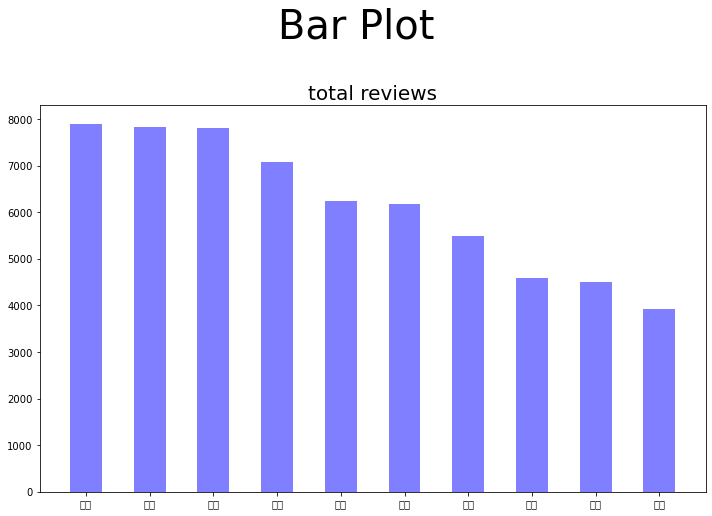

In [62]:
plt.rc('font', family='malgun')
top_10 = dict(noun_list[:10]) # 추출한 명사 중 상위 10개
plt.figure(figsize=(10,7.5))
plt.suptitle("Bar Plot", fontsize=40)
plt.title('total reviews', fontsize=20)
plt.bar(top_10.keys(), top_10.values(), width=0.5, color='b', alpha=0.5)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

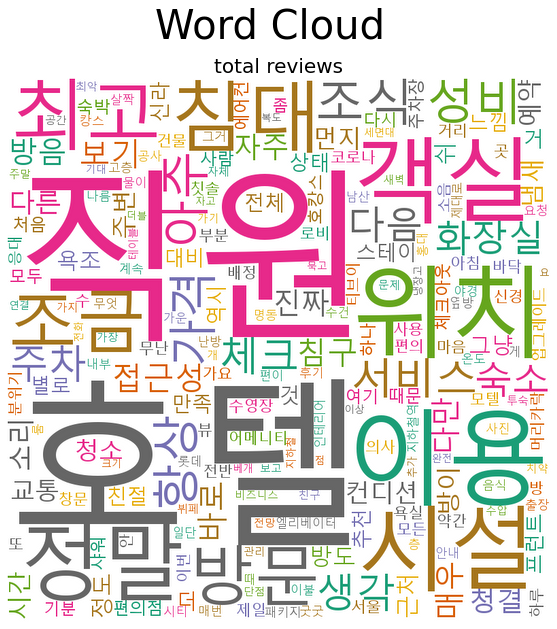

In [58]:
total_reviews = visualize(noun_list,'total reviews') # 워드클라우드 시각화

In [40]:
from sklearn.feature_extraction.text import CountVectorizer #sklearn 패키지의 CountVectorizer import

In [47]:
vectorizer = CountVectorizer() #countvectorizer 생성
vectorizer.fit(train.review_space) # countvectorizer 학습
X = vectorizer.transform(train.review_space) # transform

In [42]:
y = train.label

In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.fit(X,y)

Learning rate set to 0.100582
0:	learn: 1.5583363	total: 2.21s	remaining: 36m 44s
1:	learn: 1.4107678	total: 4.07s	remaining: 33m 48s
2:	learn: 1.3050317	total: 5.89s	remaining: 32m 37s
3:	learn: 1.2245799	total: 7.73s	remaining: 32m 5s
4:	learn: 1.1611031	total: 9.56s	remaining: 31m 43s
5:	learn: 1.1098170	total: 11.4s	remaining: 31m 22s
6:	learn: 1.0669437	total: 13.2s	remaining: 31m 16s
7:	learn: 1.0318838	total: 15.1s	remaining: 31m 6s
8:	learn: 1.0013364	total: 16.9s	remaining: 30m 58s
9:	learn: 0.9760143	total: 18.7s	remaining: 30m 52s
10:	learn: 0.9542687	total: 20.5s	remaining: 30m 47s
11:	learn: 0.9347636	total: 22.4s	remaining: 30m 46s
12:	learn: 0.9184638	total: 24.3s	remaining: 30m 44s
13:	learn: 0.9044327	total: 26.1s	remaining: 30m 40s
14:	learn: 0.8915289	total: 28.1s	remaining: 30m 42s
15:	learn: 0.8796164	total: 29.9s	remaining: 30m 39s
16:	learn: 0.8687167	total: 31.8s	remaining: 30m 38s
17:	learn: 0.8597768	total: 33.7s	remaining: 30m 37s
18:	learn: 0.8519400	total: 

In [43]:
from sklearn.linear_model import LogisticRegression

In [48]:
model = LogisticRegression()
model.fit(X,y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
#run model
X_pred = vectorizer.transform([input()]) 
y_pred = model.predict(X_pred)
print(y_pred)

 불친절함


[0]


In [53]:
test = pd.read_csv("여기어때서초크롤링.csv")
test = test.drop(test.columns[0],axis=1)

In [58]:
test.describe()

,star
count,3607.000000
mean,8.806876
std,1.878675
min,1.000000
25%,8.000000
50%,10.000000
75%,10.000000
max,10.000000


In [59]:
test.loc[test.star==10,'label']=1
test.loc[test.star<4,'label']=0

In [64]:
test = test.dropna()

In [70]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152 entries, 0 to 3605
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   review  2152 non-null   object 
 1   star    2152 non-null   float64
 2   label   2152 non-null   float64
dtypes: float64(2), object(1)
memory usage: 67.2+ KB


In [68]:
test.label.astype('category')

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3598    1.0
3599    0.0
3603    1.0
3604    1.0
3605    1.0
Name: label, Length: 2152, dtype: category
Categories (2, float64): [0.0, 1.0]

In [66]:
test1 = test.loc[test.label ==1]

In [67]:
test1

,review,star,label
0,신라스테이 서초 오랜만에 재방문했습니다.위치는 역에서 약간 떨어져있지만 너무 시끄럽...,10.0,1.0
1,"프론트에서 친절하게 대해주셨고, 방에 들어가서 큰침대 사이즈에 놀랐습니다. 전체적으...",10.0,1.0
2,좁지만 깔끔하고 침구류가 좋아요그러나 욕실은 좁아서 불편 ㅠㅠ비지니스호텔이니 이해합니당,10.0,1.0
3,강남에서 숙박할 때마다 매번 이용합니다 한 번도 바깥이나 옆에 소리가 들린 적이 없...,10.0,1.0
4,여러번 방문했는데 이번이 제일 좋았네요방 컨디션은 큰 차이 없는데 고층 배정 받았더...,10.0,1.0
...,...,...,...
3597,침구가 너무 푹신하고 일하시는 사람들이 전부 너무 친절합니다,10.0,1.0
3598,깔끔 조식......,10.0,1.0
3603,오픈한지 얼마 안되서 재빨리 예약해서 다녀왔습니다. 깔끔하고무지 마음에 들었어요. ...,10.0,1.0
3604,새 건물이라서 깨끗하고 좋았음,10.0,1.0


In [88]:
test

,review,star,label
0,신라스테이 서초 오랜만에 재방문했습니다.위치는 역에서 약간 떨어져있지만 너무 시끄럽...,10.0,1.0
1,"프론트에서 친절하게 대해주셨고, 방에 들어가서 큰침대 사이즈에 놀랐습니다. 전체적으...",10.0,1.0
2,좁지만 깔끔하고 침구류가 좋아요그러나 욕실은 좁아서 불편 ㅠㅠ비지니스호텔이니 이해합니당,10.0,1.0
3,강남에서 숙박할 때마다 매번 이용합니다 한 번도 바깥이나 옆에 소리가 들린 적이 없...,10.0,1.0
4,여러번 방문했는데 이번이 제일 좋았네요방 컨디션은 큰 차이 없는데 고층 배정 받았더...,10.0,1.0
...,...,...,...
3598,깔끔 조식......,10.0,1.0
3599,연박하는사람이 없었을까요?첫날 발렛 만원 둘째날 부터 오천원이라고 명시해놓고출차할때...,2.3,0.0
3603,오픈한지 얼마 안되서 재빨리 예약해서 다녀왔습니다. 깔끔하고무지 마음에 들었어요. ...,10.0,1.0
3604,새 건물이라서 깨끗하고 좋았음,10.0,1.0


In [93]:
x_test1 = test.review

In [94]:
y_test1 = test.label

In [95]:
#run model
X_pred = vectorizer.transform(x_test1) 
y_pred = model.predict(X_pred)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [97]:
model.score(X, y)

0.9209120788824979

In [96]:
model.score(X_pred, y_test1)

0.7950743494423792